In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

print(corpus[:3])
print(input_sequences[:3])
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print('pad')
print(input_sequences[:3])
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
print(predictors[:3],label[:3])
label = ku.to_categorical(label, num_classes=total_words)


--2021-05-16 06:50:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.81.208, 142.251.33.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-05-16 06:50:53 (114 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,']
[[34, 417], [34, 417, 877], [34, 417, 877, 166]]
pad
[[  0   0   0   0   0   0   0   0   0  34 417]
 [  0   0   0   0   0   0   0   0  34 417 877]
 [  0   0   0   0   0   0   0  34 417 877 166]]
[[  0   0   0   0   0   0   0   0   0  34]
 [  0   0   0   0   0   0   0   0  34 417]
 [  0   

In [4]:
from tensorflow.keras.layers import RNN , LSTM , Dropout , Embedding 
from tensorflow.keras.regularizers import l1,l2,l1_l2
model = Sequential()
model.add(Embedding(input_dim = total_words,output_dim=100))
model.add(Bidirectional(LSTM(128,return_sequences=True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(Bidirectional(LSTM(128)))# Another LSTM Layer)
model.add(Dense(256 , kernel_regularizer=l2(0.01),activation = 'relu'))# A Dense Layer including regularizers)
model.add(Dense(total_words,activation = 'softmax'))# A Dense Layer)
# Pick an optimizer
model.compile(
    optimizer = Adam(lr = 0.01)
    ,loss = 'categorical_crossentropy'
    ,metrics = ['accuracy']

)# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         321100    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         234496    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              825227    
Total params: 1,840,855
Trainable params: 1,840,855
Non-trainable params: 0
______________________________________________

In [5]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 13ms/step - loss: 7.1002 - accuracy: 0.0214
Epoch 2/100
484/484 [==============================] - 6s 13ms/step - loss: 6.4800 - accuracy: 0.0215
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3922 - accuracy: 0.0273
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3150 - accuracy: 0.0273
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2657 - accuracy: 0.0330
Epoch 6/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2375 - accuracy: 0.0342
Epoch 7/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2072 - accuracy: 0.0333
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1630 - accuracy: 0.0343
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1330 - accuracy: 0.0363
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 6.12

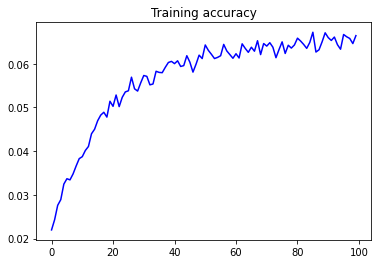

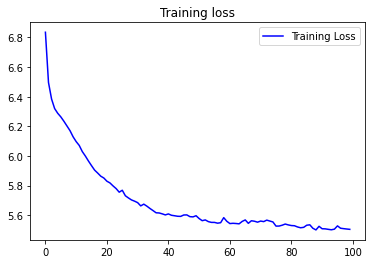

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope in the world is i am hate' thou art and i have and i am in the hate' in the in be in the world in the world in the and i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is


In [10]:
seed_text = "today is a good day"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


today is a good day of the world is i am hate' thou art and i have and i am in the hate' in the in be in the world in the world in the and i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is i am hate' i am in the world is
